<a href="https://colab.research.google.com/github/cl0wness/devirta/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('/content/wine_train.csv')

In [ ]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1300 non-null   float64
 1   volatile acidity      1300 non-null   float64
 2   citric acid           1300 non-null   float64
 3   residual sugar        1300 non-null   float64
 4   chlorides             1300 non-null   float64
 5   free sulfur dioxide   1300 non-null   float64
 6   total sulfur dioxide  1300 non-null   float64
 7   density               1300 non-null   float64
 8   pH                    1300 non-null   float64
 9   sulphates             1300 non-null   float64
 10  alcohol               1300 non-null   float64
 11  quality               1300 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 122.0 KB


In [ ]:
import seaborn as sns

In [ ]:
i = train['quality'] < 6.5
train.at[i, 'quality'] = 0

In [ ]:
i = train['quality'] > 6.5
train.at[i, 'quality'] = 1
train.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


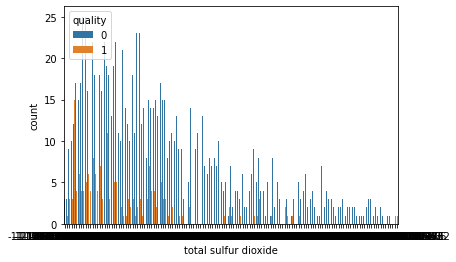

In [ ]:
sns.countplot(x = 'total sulfur dioxide', hue = 'quality', data = train)

In [ ]:
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
cols_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [ ]:
scaler.fit(train[cols_to_scale])

StandardScaler()

In [ ]:
train[cols_to_scale] = scaler.transform(train[cols_to_scale])
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.657414,0.998325,-1.461251,-0.506239,-0.266846,-0.434857,-0.381224,0.447969,1.358330,-0.591667,-0.920113,0
1,-0.430870,1.998765,-1.461251,0.029557,0.195575,0.915032,0.602802,-0.078130,-0.648147,0.095908,-0.555072,0
2,-0.430870,1.331805,-1.257680,-0.200070,0.069460,-0.049175,0.215155,0.027090,-0.259796,-0.075986,-0.555072,0
3,1.494756,-1.336037,1.388749,-0.506239,-0.287865,0.143667,0.394069,0.553189,-0.907047,-0.477071,-0.555072,0
4,-0.657414,0.998325,-1.461251,-0.506239,-0.266846,-0.434857,-0.381224,0.447969,1.358330,-0.591667,-0.920113,0


In [ ]:
X_train = train.drop('quality', axis = 1)

In [ ]:
y_train = train['quality']

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)

In [ ]:
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,1064,43
1,125,68


In [ ]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз плохое', 'Прогноз хорошее'], index = ['Факт плохое', 'Факт хорошее'])
conf_matrix_labels

,Прогноз плохое,Прогноз хорошее
Факт плохое,1064,43
Факт хорошее,125,68


In [ ]:
round((1064 + 68)/(1064 + 68 + 125 + 43), 3)

0.871

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model_accuracy = accuracy_score(y_train, y_pred_train)

In [ ]:
round(model_accuracy, 3)

0.871

In [ ]:
test = pd.read_csv('/content/wine_test.csv')
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         299 non-null    float64
 1   volatile acidity      299 non-null    float64
 2   citric acid           299 non-null    float64
 3   residual sugar        299 non-null    float64
 4   chlorides             299 non-null    float64
 5   free sulfur dioxide   299 non-null    float64
 6   total sulfur dioxide  299 non-null    float64
 7   density               299 non-null    float64
 8   pH                    299 non-null    float64
 9   sulphates             299 non-null    float64
 10  alcohol               299 non-null    float64
 11  quality               299 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 28.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.2,0.645,0.00,2.15,0.080,15.0,28.0,0.99444,3.78,0.61,12.5,6
1,6.7,0.860,0.07,2.00,0.100,20.0,57.0,0.99598,3.60,0.74,11.7,6
2,9.1,0.370,0.32,2.10,0.064,4.0,15.0,0.99576,3.30,0.80,11.2,6
3,8.0,0.280,0.44,1.80,0.081,28.0,68.0,0.99501,3.36,0.66,11.2,5
4,7.6,0.790,0.21,2.30,0.087,21.0,68.0,0.99550,3.12,0.44,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
294,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
295,5.9,0.550,0.10,2.20,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
296,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
297,5.9,0.645,0.12,2.00,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
i = test['quality'] < 6.5
test.at[i, 'quality'] = 0
i = test['quality'] > 6.5
test.at[i, 'quality'] = 1

In [ ]:
scaler1 = StandardScaler()
cols_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
scaler1.fit(test[cols_to_scale])
test[cols_to_scale] = scaler.transform(test[cols_to_scale])
test.tail(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
279,-1.337047,0.220204,-1.003216,-0.659324,-0.750285,0.818611,-0.440862,-1.540686,1.552506,-0.362475,0.813830,0
280,-0.657414,-0.946977,0.218213,-0.123528,-0.434998,-0.627699,-0.619776,-1.182938,0.387454,-0.362475,1.361391,0
281,-1.337047,0.220204,-1.003216,-0.659324,-0.750285,0.818611,-0.440862,-1.540686,1.552506,-0.362475,0.813830,0
282,-1.393683,1.081695,-0.952323,0.029557,-0.750285,-0.242016,-0.589957,-1.751125,1.746681,-0.935454,1.361391,0
283,-1.337047,-0.335597,0.014641,-0.353155,-0.308884,1.589977,1.527190,-0.614751,0.193279,-0.247879,-0.555072,0
284,-1.053866,-1.113717,0.778034,-0.123528,-0.582132,0.818611,-0.381224,-1.109284,-0.065621,0.783482,1.087610,1
285,-0.770686,-0.724657,0.778034,0.029557,-0.477037,0.625770,0.036242,-1.056674,-0.000896,1.012674,0.996350,0
286,-0.600778,-1.169297,0.625356,-0.123528,-0.498056,1.782818,0.394069,-1.067196,0.258004,1.069972,0.905090,0
287,-1.563591,0.498104,-0.901430,-0.582782,-0.477037,0.240087,-0.560138,-1.114545,1.617231,-0.018688,0.448789,0
288,-0.770686,0.776004,0.218213,-0.046985,-0.434998,1.782818,1.646466,-1.477554,-0.195071,0.668887,2.182732,0


In [ ]:
X_test = test.drop('quality', axis = 1)
y_pred_test = model.predict(X_test)

In [ ]:
import numpy as np
ids = X_test.index
ids += 1300
ids

RangeIndex(start=1300, stop=1599, step=1)

In [ ]:
result = pd.DataFrame({'wineId': ids,'quality': y_pred_test})
result.head(10)

,wineId,quality
0,1300,0
1,1301,0
2,1302,0
3,1303,0
4,1304,0
5,1305,0
6,1306,0
7,1307,0
8,1308,0
9,1309,0


In [ ]:
result.to_csv('result.csv', index = False)
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


In [ ]:
from google.colab import files
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>